# Descriptive statistics - Unit 02: Central Tendency

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Learn and apply the concepts of central tendency: mean, median and mode


---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png">Central Tendency

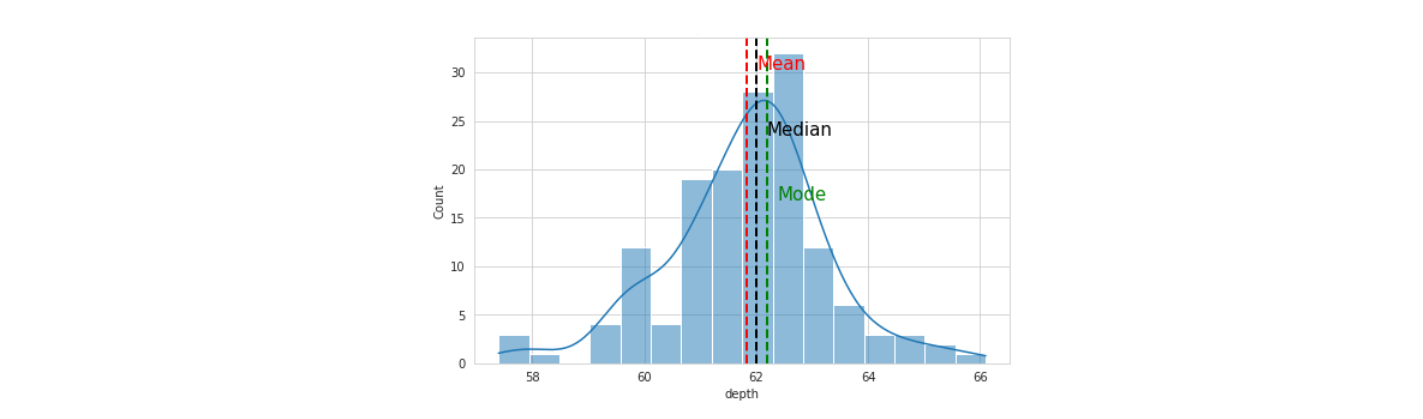

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Before we start studying Central Tendency, let's assess the data we will study.
  * The dataset was generated using NumPy random module and showed the following distributions: Normal, Exponential, Poisson, and Uniform
  * There is a column called Positive Skewed and Negative Skewed. Skewness is a measure of symmetry. Distribution is symmetric when it looks the same to the left and right of the center point. It is horizontally mirrored. We will study this measure in more detail; however, for now, we just want to cover the concept
  * We are rounding the numbers with .round(). We are interested in values up to 3 decimal points

  

from scipy.stats import skewnorm
np.random.seed(seed=1)
size=1000

X1 = np.random.normal(loc=40, scale=2, size=int(size/2) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/2) ) 
bi_modal = np.concatenate([X1, X2])

X1 = np.random.normal(loc=40, scale=4, size=int(size/4) )
X2 = np.random.normal(loc=10, scale=4, size=int(size/4) ) 
X3 = np.random.normal(loc=0, scale=2, size=int(size/4) ) 
X4 = np.random.normal(loc=80, scale=2, size=int(size/4) ) 
multi_modal = np.concatenate([X1, X2, X3, X4])


df = pd.DataFrame(data={'Normal':np.random.normal(loc=0, scale=2, size=size),
                        "Positive Skewed": skewnorm.rvs(a=10, size=size),
                        "Negative Skewed": skewnorm.rvs(a=-10, size=size),
                        "Exponential":np.random.exponential(scale=20,size=size),
                        "Uniform":np.random.uniform(low=0.0, high=1.0, size=size),
                        "Bimodal":  bi_modal,
                        "Multimodal":  multi_modal,
                        "Poisson":np.random.poisson(lam=1.0, size=size),
                        "Discrete": np.random.choice([10,12,14,15,16,17,20],size=size),
                        }).round(3)

df.head(3)

Let's plot the distribution for each column
* We will loop over each DataFrame column, create a figure and plot a histogram using `sns.histplot()`
* Pay attention to the shapes and in which range in the x-axis is most frequent, in other words, where there is a higher "count"

for col in df.columns:
  plt.figure(figsize=(8,4))
  sns.histplot(data=df, x=col, kde=True)
  plt.title(f"{col} Distribution")
  plt.xlabel(" ")
  plt.show();
  print("\n\n")

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Central tendency helps provide **figures to summarize** the data. We will start studying
* Mean
* Median 
* Mode


---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Mean

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Mean, or average, is defined as the **number that the data is spread around that sample**.
*  It is the sum of all elements divided by the total number of observations. 

To calculate the DataFrame mean, just use the method `.mean()` to see mean levels for each numerical variable. The documentation link is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

df.mean()

Let's consider the normal distribution from DataFrame `df` and plot it

col = 'Normal'

plt.figure(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)
plt.show()

Let's now add the mean level to the histogram, so we can better understand where the mean lies.
* Quick note on `plt.text()`: we programmatically set the text position. We use `x` as the mean plus an offset, so the text is not on the top of the line. The offset we used is a fraction of the value from the standard deviation. It could be any other figure/metric, but the trick finds a slight offset to the text. We will explain later the concept and applications of standard deviation. For `y', we gathered the y axis range with `.get_ylim()` and used the upper value with [1], so we could access the "ceiling" of the graph. Then, to increase readability, we shifted this value a bit by multiplying by 0.9 - this number is arbitrary; it's just for readability purposes.

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)
plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')
plt.show()

You already saw the distribution shape for all variables. Next, we will scan over the variables and will plot their distribution. 

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> **Before plotting, could you imagine where the mean level would be? Go back to the previous graphs with all histograms and guess where the mean level would be positioned**
* ONLY after doing that, run the cell below

for col in df.columns:

  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)
  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')
  plt.show()
  print("\n")



---

#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Median

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Median is the element that **divides the data into two equal parts**. 
  * It is calculated by arranging the data in ascending or descending order.
    * Then, if the number of elements is odd, it is given to the middle element in the arranged values. 
    * If the number of observations is even, the median is given by the mean of the two middle elements

To calculate the DataFrame median, just use the method `.median()` to see median levels for each numerical variable. The documentation link is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html)

df.median()

Let's plot the distribution, the median and the mean for normal distribution
  * You will notice mean and median levels are the same in a normal distribution. A normal distribution is one that is symmetrical around the mean.
  * We are running the same code from the previous section. The difference is that we are adding a line and text for the median level 

col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)

plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

plt.show()

We will again plot all the columns from df, showing the mean and the median

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png">  Before plotting, could you guess what the mean and median level would be?
* Go back to the previous set of histograms and visualize where the median level would be. Once you finish this small task, run the cell below.

for col in df.columns:

  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

  plt.show()
  print("\n")


#### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Mode

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png">  Mode is the **most common element in the data**, the one that appears most often.
  * If there is only one number as mode, it is called Uni-modal.
  * If there are two numbers as mode, it is called Bi-modal.
  * If there are more than two modes, it is called Multi-modal.

To calculate the DataFrame mean, just use the method `.mode()` to see mode levels for each numerical variable. The documentation link is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html)
* You will notice that the variables may contain more than one mode; This is fine; that just means that the given distribution has more than one number/element that is typically frequent. For **simplicity**, we will plot in the upcoming exercise only the most frequent element. We do that by gathering the first element with [0]

df.mode()

Consider the Normal Distribution. You will notice that mean, median and mode have similar levels
* We are running the same code from the previous section. The difference is that we are adding a line and text for the mode level

col = 'Normal'

fig, axes = plt.subplots(figsize=(8,5))
sns.histplot(data=df, x=col, kde=True)

plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

plt.axvline(df[col].mode()[0], color='g', linestyle='dashed', linewidth=2)
plt.text(x=df[col].mode()[0] + df[col].std()/8 , y=axes.get_ylim()[1] * 0.50, s='Mode', fontsize=15, c='g')

plt.show()

We will scan over the variables, and will plot its distribution.


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png">  Pay attention to the central figures (or central tendency elements) from your data: **mean, median, and mode level**. 
* Are they different? Much different?
* How are they positioned? For example: is the mean greater than the median?

for col in df.columns:
    
  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

  plt.axvline(df[col].mode()[0], color='g', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mode()[0] + df[col].std()/8 , y=axes.get_ylim()[1] * 0.50, s='Mode', fontsize=15, c='g')


  plt.show()
  print("\n")

---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE**: Select one of the suggested datasets and explore the central tendency on the numerical variables
* You will see a set of suggestions; you may change `dataset` variable to pick your data

dataset = 'diamonds'  # 'penguins' 'iris' ,  'tips'  , 'mpg' , 'diamonds'
df = (sns.load_dataset(dataset)
      .sample(n=200,random_state=1)
      .select_dtypes(exclude=['object', 'category'] # for some reason seaborn datasets sometimes come with 
                                                    # variables' type marked as category
                                                    # instead of object.
                     )) 
print(df.shape)
df.head()

Examine the distribution shape for the variables. Ask yourself:
* What is the distribution shape?
* Do they look like the distributions (normal, exponential, multimodal etc.) we saw in this unit? Or, does it look like a combination of shapes?
* What is the range (in the x axis) that the data is most frequent?

for col in df.columns:
    
  fig, axes = plt.subplots(figsize=(8,5))
  plt.title(f"{col} Distribution")
  sns.histplot(data=df, x=col, kde=True)

  plt.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

  plt.axvline(df[col].median(), color='k', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].median() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.70, s='Median', fontsize=15, c='k')

  plt.axvline(df[col].mode()[0], color='g', linestyle='dashed', linewidth=2)
  plt.text(x=df[col].mode()[0] + df[col].std()/8 , y=axes.get_ylim()[1] * 0.50, s='Mode', fontsize=15, c='g')

#   plt.show()
  plt.savefig('diamond.png')
  print("\n")

---

ls

pwd


